Mini Exam - Wine Quality Dataset

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn import datasets
from scipy.stats import poisson, randint

In [2]:
# loads the dataset by dividing between features and labels
features, target = datasets.load_wine(return_X_y = True, as_frame = True)

In [3]:
display(features)
display(target)

# shows how many possible labels are
pd.unique(target)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

array([0, 1, 2])

In [4]:
# divides into training set and test set, using 30% of the data for the test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.30)

In [5]:
# creates the model (DecisionTreeClassifier)
tree = DecisionTreeClassifier()

# creates distribution of hyperparameters
depth_distribution = {'max_depth': poisson(mu = 10), 'max_leaf_nodes': randint(low = 5, high = 35), 'random_state' : [42]}

# valid hyperparameters
clf = RandomizedSearchCV(estimator = tree, n_iter = 10, param_distributions = depth_distribution, n_jobs = -1, scoring = 'accuracy', cv = 5, random_state = 42)

# trains the model
clf.fit(X_train, y_train)

# prints the best parameter values
print(f'The best parameter values are: {clf.best_params_}')

# evaluates the average accuracy of the best combination of parameters
tree_score = clf.best_score_
print(f"The average accuracy of the best model is {tree_score}")
                                                  
# evaluates the accuracy on the test set
tree_test_score = accuracy_score(y_test, clf.predict(X_test))
print(f"Accuracy on the test set is {tree_test_score}")

the best parameter values are: {'max_depth': 12, 'max_leaf_nodes': 11, 'random_state': 42}
the average accuracy of the best model is 0.9113333333333333
accuracy on the test set is 0.9074074074074074


In [6]:
# checks that the accuracy is not due to a prevailing class
target.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

The Decision Tree model already provides good results on the test set (85% accuracy). However, switching to a Random Forest model could further reduce the excessive variance of the model and therefore a possible slight overfitting.

In [7]:
# creates the model (RandomForestClassifier)
random_forest = RandomForestClassifier()

# created a dictionary with possible parameter values
params = {'n_estimators': poisson(mu = 100), 'max_features': randint(low = 3, high = 13), 'random_state' : [42]}

# valid parameters
clf = RandomizedSearchCV(estimator = random_forest, param_distributions = params, n_jobs =-1, scoring = 'accuracy', cv = 5, n_iter = 10, random_state = 42)
clf.fit(X_train, y_train)

# checks the best values of the hyperparameters and their accuracy
print(f""" The best values of the hyperparameters are: {clf.best_params_} 
 Their average accuracy on the training set is {clf.best_score_}""")

 The best values of the hyperparameters are: {'max_features': 9, 'n_estimators': 109, 'random_state': 42} 
 Their average accuracy on the training set is 0.9596666666666666


In [8]:
# calculates the accuracy of the model on the test set
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9259259259259259


As you can see, the accuracy of the model on the test set has increased by over 10%. You could also consider eliminating some features and check if this leads to a decrease in the accuracy of the model.

In [9]:
# looks at the feature scores using SelectKbest
selector = SelectKBest(k = 'all')

# applies the selector to the training set only, and print the feature scores
selector.fit(X_train, y_train)

# creates a dataframe with the importance of each feature
feature_imp = pd.Series(selector.scores_, index = X_train.columns)

# sorted the features by importance
feature_imp.sort_values(inplace= True, ascending = False)

# stampo il dataFrame
feature_imp

proline                         160.338846
flavanoids                      153.255641
od280/od315_of_diluted_wines    130.287173
alcohol                          94.156847
color_intensity                  81.639958
hue                              79.180199
total_phenols                    58.847925
malic_acid                       34.399041
alcalinity_of_ash                22.527483
proanthocyanins                  21.349809
nonflavanoid_phenols             21.152860
magnesium                        13.961903
ash                              12.369146
dtype: float64

The series shows a certain difference between the characteristics that have an importance higher than 50 and the others. For this reason, only the most relevant features for the selector will be considered below.

Features with an importance greater than 50 are 7


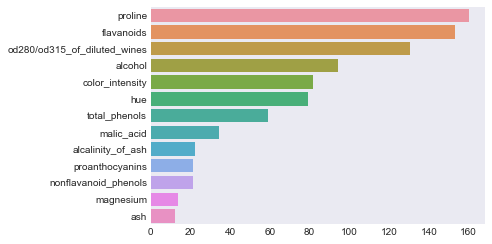

In [10]:
# select only the features with a score higher than 50
print('Features with an importance greater than 50 are', len([score for score in selector.scores_ if score > 50 ]))

# set chart style
plt.style.use('seaborn-dark')

# seaborn.barplot (graph)
sns.barplot(y = feature_imp.index, x = feature_imp.values, order = feature_imp.index.to_list())

plt.show()

In [11]:
# creates a selector of the best 7 features
selector = SelectKBest(k = 7)

# transformed the original feature matrix
X_train_new = selector.fit_transform(X_train, y_train)
print(X_train_new.shape)

(124, 7)


In [12]:
# creates a new model to train on the new features matrix (RandomForestClassifier)
random_forest = RandomForestClassifier()

# created a dictionary with possible parameter values
params = {'n_estimators': poisson(mu = 100), 'max_features': randint(low = 3, high = 7), 'random_state' : [42]}

# valid parameters 
clf = RandomizedSearchCV(estimator = random_forest, param_distributions = params, n_jobs =-1, scoring = 'accuracy', cv = 5, n_iter = 10, random_state = 42)

# trains the model on the new features matrix
clf.fit(X_train_new, y_train)

# checks the best values of the parameters
print(f'''The best parameter values are {clf.best_params_} 
Their average accuracy on the training set is {clf.best_score_}''')


The best parameter values are {'max_features': 3, 'n_estimators': 98, 'random_state': 42} 
Their average accuracy on the training set is 0.976


In [13]:
# also applied the selection to the test set
X_test_new = selector.fit_transform(X_test, y_test)

# recalculate the accuracy of the model
clf.score(X_test_new, y_test)

0.9444444444444444

Recalculating the accuracy it is evident that a large part of the model's performance is produced by the best 7 features. However, the accuracy on the test set after the feature selection is less than 6%, a not negligible amount.